In [72]:
import pandas as pd

df = pd.read_csv('Telco-Customer-Churn.csv')


In [ ]:
#COnvert the TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: x.replace('$', '').replace(',', ''))
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Filter churned and stayed customers
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
churned_customers = df[df['Churn'] == 1]
stayed_customers = df[df['Churn'] == 0]

# Check the data types of TotalCharges and MonthlyCharges
print(df[['TotalCharges', 'MonthlyCharges']].dtypes)


# Calculate medians for churned customers
median_churned = {
    'Median TotalCharges': churned_customers['TotalCharges'].median(),
    'Median MonthlyCharges': churned_customers['MonthlyCharges'].median()
}

# Calculate medians for stayed customers
median_stayed = {
    'Median TotalCharges': stayed_customers['TotalCharges'].median(),
    'Median MonthlyCharges': stayed_customers['MonthlyCharges'].median()
}

print("Median for Churned Customers:", median_churned)
print("Median for Stayed Customers:", median_stayed)

TotalCharges      float64
MonthlyCharges    float64
dtype: object
Median for Churned Customers: {'Median TotalCharges': 703.55, 'Median MonthlyCharges': 79.65}
Median for Stayed Customers: {'Median TotalCharges': 1683.6, 'Median MonthlyCharges': 64.42500000000001}


In [38]:
# Features to analyze
features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Calculate the percentage of customers who have used each feature
feature_usage = {}
for feature in features:
    feature_usage[feature] = (df[feature].value_counts(normalize=True) * 100).to_dict()

print("Feature Usage:")
print(feature_usage)

Feature Usage:
{'PhoneService': {'Yes': 90.31662643759762, 'No': 9.683373562402386}, 'MultipleLines': {'No': 48.13289791282124, 'Yes': 42.18372852477638, 'No phone service': 9.683373562402386}, 'InternetService': {'Fiber optic': 43.958540394718156, 'DSL': 34.37455629703251, 'No': 21.666903308249324}, 'OnlineSecurity': {'No': 49.666335368450945, 'Yes': 28.666761323299728, 'No internet service': 21.666903308249324}, 'DeviceProtection': {'No': 43.944341899758626, 'Yes': 34.38875479199205, 'No internet service': 21.666903308249324}, 'TechSupport': {'No': 49.31137299446259, 'Yes': 29.02172369728809, 'No internet service': 21.666903308249324}, 'StreamingTV': {'No': 39.89777083629135, 'Yes': 38.435325855459325, 'No internet service': 21.666903308249324}, 'StreamingMovies': {'No': 39.542808462303, 'Yes': 38.790288229447675, 'No internet service': 21.666903308249324}}


In [ ]:
# Calculate the churn status for customers who used each feature
from pprint import pprint

churn_status = {}

for feature in features:
    churned = df[df['Churn'] == 'Yes'][feature].value_counts(normalize=True) * 100
    active = df[df['Churn'] == 'No'][feature].value_counts(normalize=True) * 100
    churn_status[feature] = {
        'Churned': churned.to_dict(),
        'Active': active.to_dict()
    }

print("\nChurn Status by Feature:")
print(churn_status)



Churn Status by Feature:
{'PhoneService': {'Churned': {'Yes': 90.90422685928304, 'No': 9.095773140716961}, 'Active': {'Yes': 90.10436799381523, 'No': 9.89563200618477}}, 'MultipleLines': {'Churned': {'Yes': 45.4788657035848, 'No': 45.42536115569823, 'No phone service': 9.095773140716961}, 'Active': {'No': 49.110939311944335, 'Yes': 40.99342868187089, 'No phone service': 9.89563200618477}}, 'InternetService': {'Churned': {'Fiber optic': 69.39539860888175, 'DSL': 24.558587479935795, 'No': 6.046013911182451}, 'Active': {'DSL': 37.920371086200234, 'Fiber optic': 34.77000386548125, 'No': 27.309625048318516}}, 'OnlineSecurity': {'Churned': {'No': 78.1701444622793, 'Yes': 15.783841626538257, 'No internet service': 6.046013911182451}, 'Active': {'No': 39.3699265558562, 'Yes': 33.32044839582528, 'No internet service': 27.309625048318516}}, 'DeviceProtection': {'Churned': {'No': 64.7940074906367, 'Yes': 29.159978598180846, 'No internet service': 6.046013911182451}, 'Active': {'No': 36.412833397

In [40]:
print("\nChurn Status by Feature (Percentage of Usage):\n")
for feature, status in churn_status.items():
    print(f"Feature: {feature}")
    print("  - Churned:")
    for usage, percentage in status['Churned'].items():
        print(f"      {usage}: {percentage:.2f}%")
    print("  - Active:")
    for usage, percentage in status['Active'].items():
        print(f"      {usage}: {percentage:.2f}%")
    print("\n")


Churn Status by Feature (Percentage of Usage):

Feature: PhoneService
  - Churned:
      Yes: 90.90%
      No: 9.10%
  - Active:
      Yes: 90.10%
      No: 9.90%


Feature: MultipleLines
  - Churned:
      Yes: 45.48%
      No: 45.43%
      No phone service: 9.10%
  - Active:
      No: 49.11%
      Yes: 40.99%
      No phone service: 9.90%


Feature: InternetService
  - Churned:
      Fiber optic: 69.40%
      DSL: 24.56%
      No: 6.05%
  - Active:
      DSL: 37.92%
      Fiber optic: 34.77%
      No: 27.31%


Feature: OnlineSecurity
  - Churned:
      No: 78.17%
      Yes: 15.78%
      No internet service: 6.05%
  - Active:
      No: 39.37%
      Yes: 33.32%
      No internet service: 27.31%


Feature: DeviceProtection
  - Churned:
      No: 64.79%
      Yes: 29.16%
      No internet service: 6.05%
  - Active:
      No: 36.41%
      Yes: 36.28%
      No internet service: 27.31%


Feature: TechSupport
  - Churned:
      No: 77.37%
      Yes: 16.59%
      No internet service: 6.05%
 

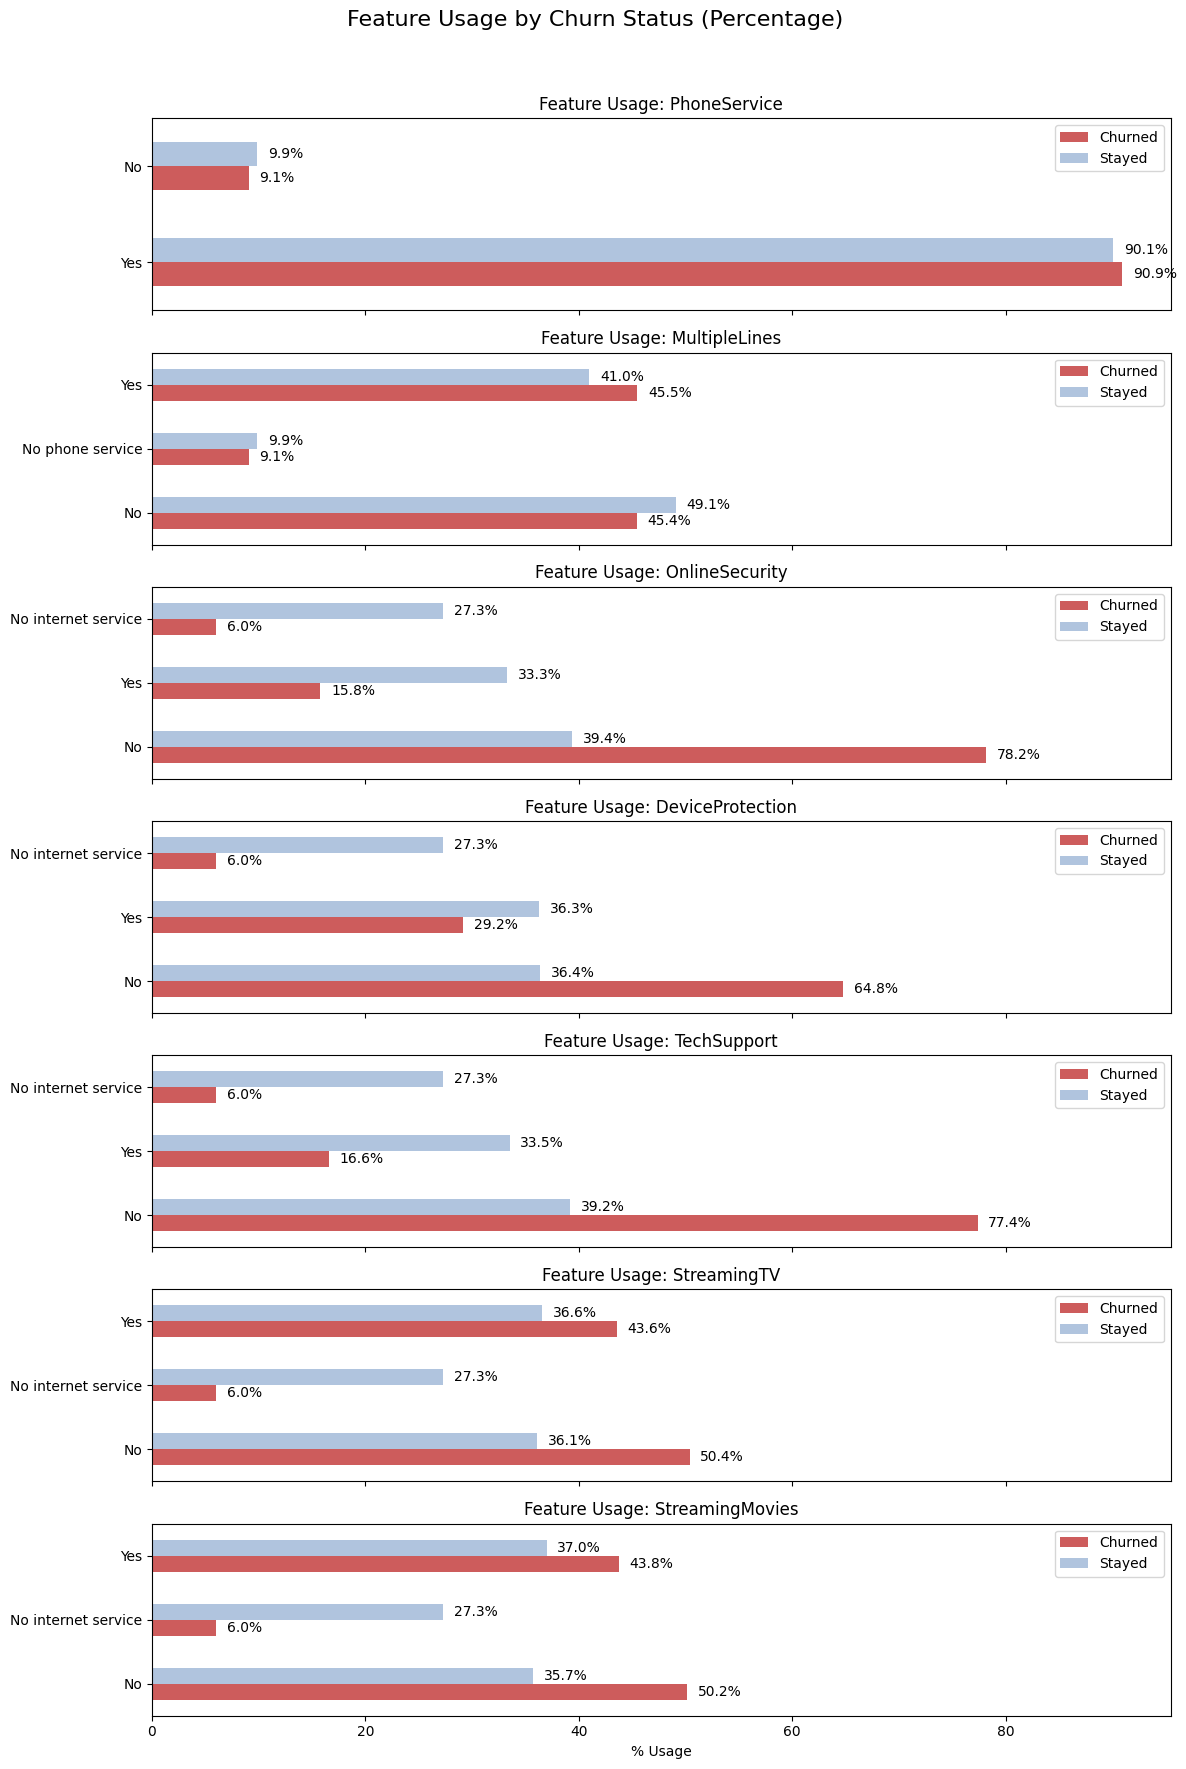

In [73]:
# Calculate feature usage for churned and stayed customers
import matplotlib.pyplot as plt

feature_usage_churned = {}
feature_usage_stayed = {}

for feature in features:
    churned = df[df['Churn'] == "Yes"][feature].value_counts(normalize=True) * 100
    stayed = df[df['Churn'] == "No"][feature].value_counts(normalize=True) * 100

    # Combine churned and stayed data for visualization
    feature_usage_churned[feature] = churned.to_dict()
    feature_usage_stayed[feature] = stayed.to_dict()

# Create bar chart for feature usage
fig, axes = plt.subplots(len(features), 1, figsize=(12, 18), sharex=True)

for i, feature in enumerate(features):
    churned = pd.Series(feature_usage_churned[feature])
    stayed = pd.Series(feature_usage_stayed[feature])

    combined_data = pd.DataFrame({'Churned': churned, 
                                  'Stayed': stayed}).fillna(0)

    ax = axes[i]
    combined_data.plot(kind='barh',
                       ax=ax,
                       color=['indianred', 'lightsteelblue'])
    
    # Add data labels
    for bar in ax.patches:
        width = bar.get_width()
        if width > 0:  # Only label non-zero bars
            ax.text(width + 1, bar.get_y() + bar.get_height() / 2,
                    f'{width:.1f}%', va='center')
    
    ax.set_title(f'Feature Usage: {feature}')
    ax.set_xlabel('% Usage')
    ax.set_ylabel('')

# Add an overarching title
fig.suptitle('Feature Usage by Churn Status (Percentage)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.savefig('my_plot2.png')
plt.show()

<Figure size 640x480 with 0 Axes>